In [ ]:
###   this code is developed on the top of section 2_classficiation on IRIS
###    comparing depth = 5 with depth = 3 to demostrate overfitting
###    also add the plot to visualize the wrong fitting/prediciton 

In [29]:
# <help:cookbook_setup>
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import numpy as np 
import sklearn
import sklearn.datasets
from sklearn.datasets import load_iris
import sklearn.metrics as metrics 


In [12]:
# load iris dataset 

dataset_raw = load_iris(as_frame=True)
list(dataset_raw)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [13]:
####   define X and Y for analysis 
# define feature vectors (X) and target (y)
X = dataset_raw.data   
y = dataset_raw.target 
labels = dataset_raw.target_names 
labels  

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
### visual check the dataset 
print(type(X))
 

<class 'pandas.core.frame.DataFrame'>


In [15]:
## first 5 obs
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
#last 5 obs
X.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [17]:
## basic describe,  
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
## check missing 
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

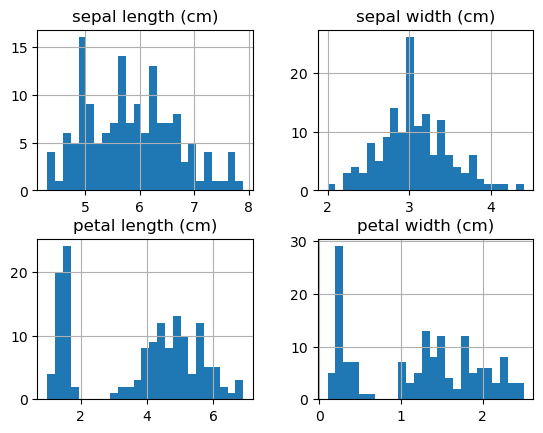

In [19]:
###visual check the distribution 
X.hist(bins =25)

In [20]:
####    training testing split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

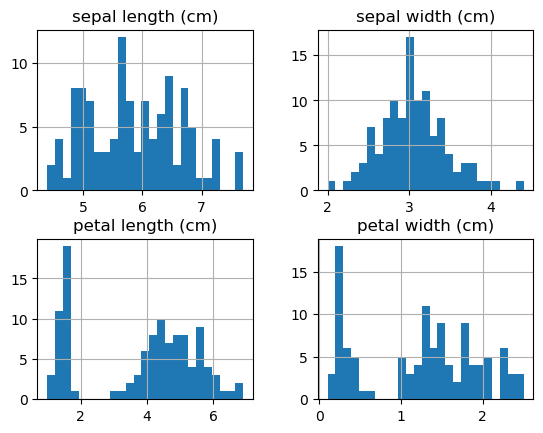

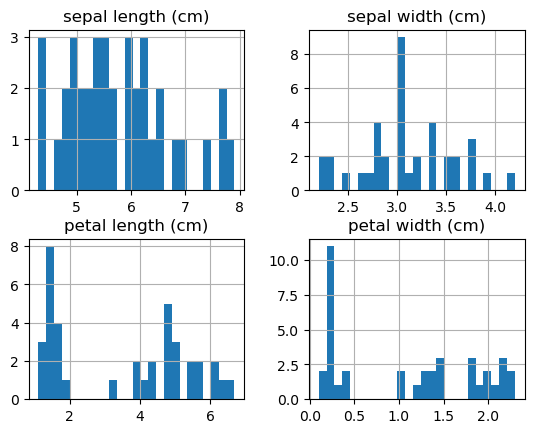

In [21]:
####   visual compare the training and testing distribution 
####    the distribution does not need to be similar, some discrepency support strong validation result 
X_train.hist(bins = 25)
X_test.hist(bins = 25) 

In [ ]:
##  decision tree, compare two trees, with depth of 3 and 5:     5 is overfitting

In [22]:
from sklearn.tree import DecisionTreeClassifier

TreeModel_3 = DecisionTreeClassifier(max_depth =3, random_state = 13)
TreeModel_5 = DecisionTreeClassifier(max_depth =5, random_state = 13)


TreeModel_3.fit(X_train, y_train)
TreeModel_5.fit(X_train, y_train) 


DecisionTreeClassifier(max_depth=5, random_state=13)

In [23]:
#####   predict of two model 


y_pred_train_3 = TreeModel_3.predict(X_train)
y_pred_test_3 = TreeModel_3.predict(X_test)

y_pred_train_5 = TreeModel_5.predict(X_train)
y_pred_test_5 = TreeModel_5.predict(X_test)


In [24]:
#### accurate score 

from sklearn.metrics import accuracy_score

acc_train_3 = accuracy_score(y_pred_train_3, y_train) 
acc_test_3 = accuracy_score(y_pred_test_3, y_test) 


acc_train_5 = accuracy_score(y_pred_train_5, y_train) 
acc_test_5 = accuracy_score(y_pred_test_5, y_test) 

print( acc_train_3)
print( acc_train_5)

print( acc_test_3)
print( acc_test_5)

0.9821428571428571
1.0
0.9210526315789473
0.9210526315789473


In [4]:
from sklearn.tree import plot_tree

Text(0.5, 1.0, 'TreeModel depth =5 ')

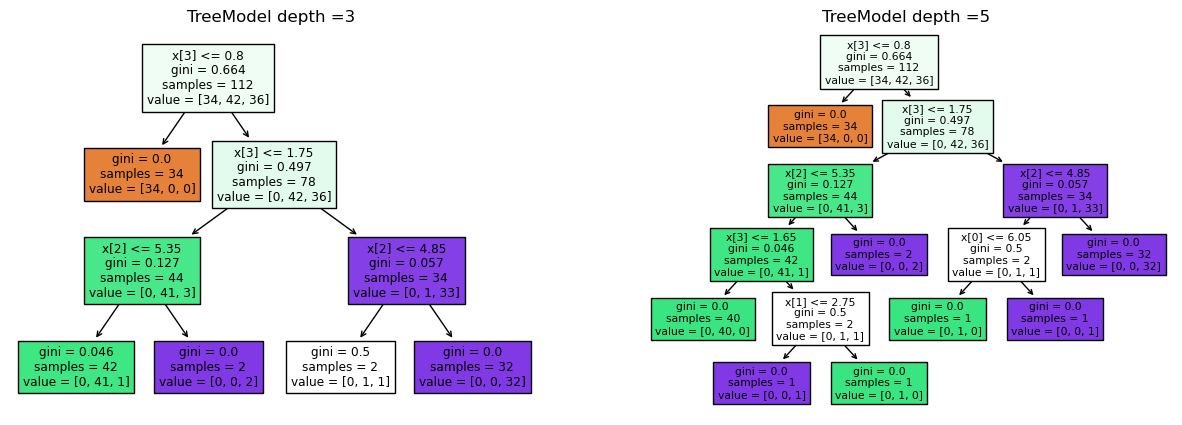

In [32]:
### visualize the tree 
 # use subplots to plot the decision tree and the decision boundaries
fig, (ax1, ax2 ) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

    # plot the decision tree
plot_tree(TreeModel_3, filled=True, ax=ax1 )
ax1.set_title("TreeModel depth =3 ")
 
plot_tree(TreeModel_5, filled=True, ax=ax2 )
ax2.set_title("TreeModel depth =5 ")

Text(0.5, 1.0, 'Labels and decision boundaries depth =3')

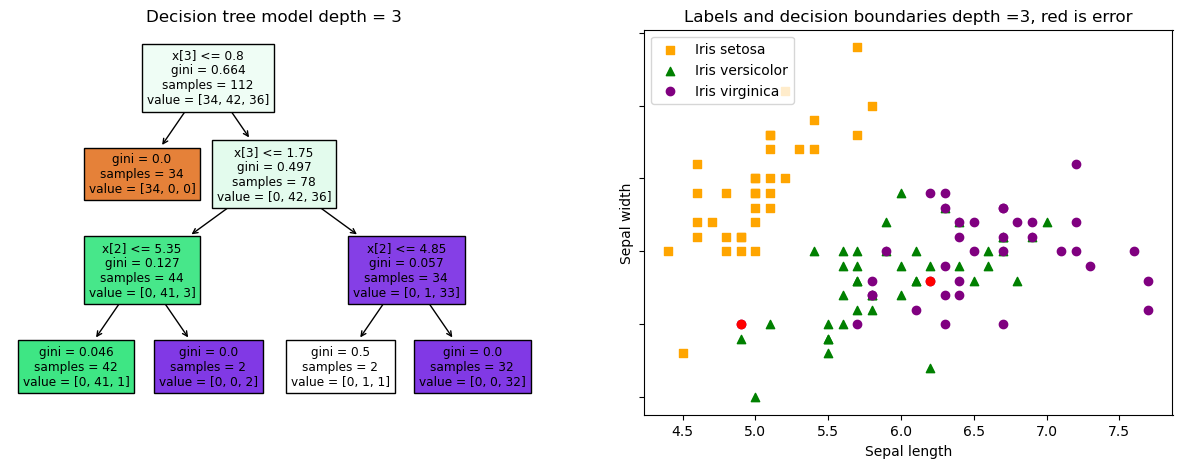

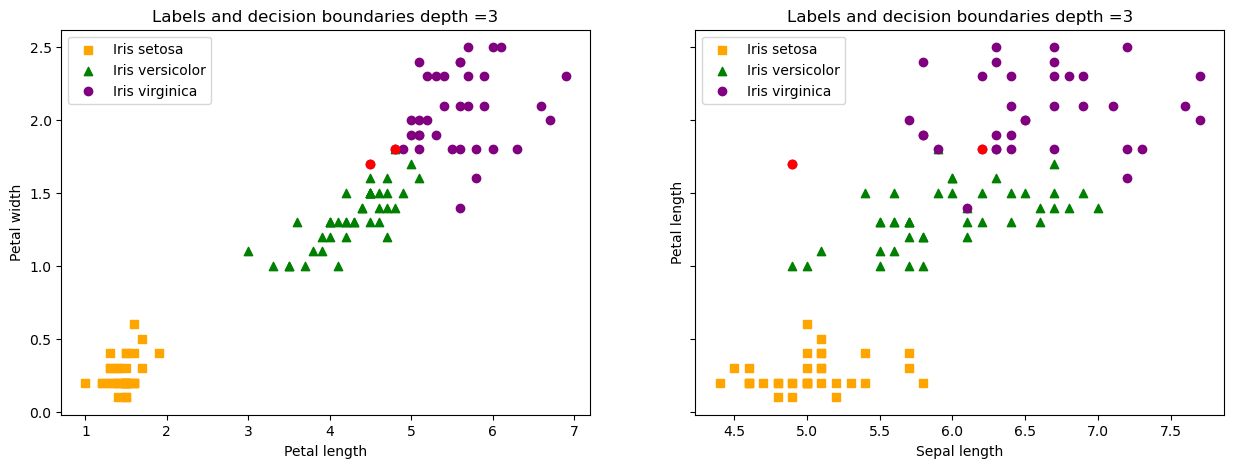

In [33]:
### deep diving on depth =3    visualize the error prediction/fitting by red

# use subplots to plot the decision tree and the decision boundaries
fig, (ax1, ax2 ) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

    # plot the decision tree
plot_tree(TreeModel_3, filled=True, ax=ax1)
ax1.set_title("Decision tree model depth = 3")

 


    # plot params
xlim0, xlim1 = 0, 7
ylim0, ylim1 = 0, 3

    # plot labels of 
ax2.scatter(X_train.values[y_train.values == 0, 0], X_train.values[y_train.values == 0, 1], color='orange', marker='s', label="Iris setosa")
ax2.scatter(X_train.values[y_train.values == 1, 0], X_train.values[y_train.values == 1, 1], color='green', marker='^', label="Iris versicolor")
ax2.scatter(X_train.values[y_train.values == 2, 0], X_train.values[y_train.values == 2, 1], color='purple', marker='o', label="Iris virginica")

ax2.scatter(X_train.values[(y_train.values == 0) & (y_pred_train_3!=0), 0], X_train.values[(y_train.values == 0) & (y_pred_train_3!=0), 1], color='red', marker='s' )
ax2.scatter(X_train.values[(y_train.values == 1) & (y_pred_train_3!=1), 0], X_train.values[(y_train.values == 1) & (y_pred_train_3!=1), 1], color='red', marker='^' )
ax2.scatter(X_train.values[(y_train.values == 2) & (y_pred_train_3!=2), 0], X_train.values[(y_train.values == 2) & (y_pred_train_3!=2), 1], color='red', marker='o' )

ax2.set_xlabel("Sepal length")
ax2.set_ylabel("Sepal width")
ax2.legend(loc="upper left")
ax2.set_title("Labels and decision boundaries depth =3, red is error")

 ##  
fig, (ax1, ax2 ) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

    # plot labels of 
ax1.scatter(X_train.values[y_train.values == 0, 2], X_train.values[y_train.values == 0, 3], color='orange', marker='s', label="Iris setosa")
ax1.scatter(X_train.values[y_train.values == 1, 2], X_train.values[y_train.values == 1, 3], color='green', marker='^', label="Iris versicolor")
ax1.scatter(X_train.values[y_train.values == 2, 2], X_train.values[y_train.values == 2, 3], color='purple', marker='o', label="Iris virginica")
ax1.scatter(X_train.values[(y_train.values == 0) & (y_pred_train_3!=0), 2], X_train.values[(y_train.values == 0) & (y_pred_train_3!=0), 3], color='red', marker='s' )
ax1.scatter(X_train.values[(y_train.values == 1) & (y_pred_train_3!=1), 2], X_train.values[(y_train.values == 1) & (y_pred_train_3!=1), 3], color='red', marker='^' )
ax1.scatter(X_train.values[(y_train.values == 2) & (y_pred_train_3!=2), 2], X_train.values[(y_train.values == 2) & (y_pred_train_3!=2), 3], color='red', marker='o' )


ax1.set_xlabel("Petal length")
ax1.set_ylabel("Petal width")
ax1.legend(loc="upper left")
ax1.set_title("Labels and decision boundaries depth =3")

 # plot labels of 
ax2.scatter(X_train.values[y_train.values == 0, 0], X_train.values[y_train.values == 0, 3], color='orange', marker='s', label="Iris setosa")
ax2.scatter(X_train.values[y_train.values == 1, 0], X_train.values[y_train.values == 1, 3], color='green', marker='^', label="Iris versicolor")
ax2.scatter(X_train.values[y_train.values == 2, 0], X_train.values[y_train.values == 2, 3], color='purple', marker='o', label="Iris virginica")

ax2.scatter(X_train.values[(y_train.values == 0) & (y_pred_train_3!=0), 0], X_train.values[(y_train.values == 0) & (y_pred_train_3!=0), 3], color='red', marker='s' )
ax2.scatter(X_train.values[(y_train.values == 1) & (y_pred_train_3!=1), 0], X_train.values[(y_train.values == 1) & (y_pred_train_3!=1), 3], color='red', marker='^' )
ax2.scatter(X_train.values[(y_train.values == 2) & (y_pred_train_3!=2), 0], X_train.values[(y_train.values == 2) & (y_pred_train_3!=2), 3], color='red', marker='o' )

ax2.set_xlabel("Sepal length")
ax2.set_ylabel("Petal length")
ax2.legend(loc="upper left")
ax2.set_title("Labels and decision boundaries depth =3")


Text(0.5, 1.0, 'Labels and decision boundaries depth =5, No Error (red is error)')

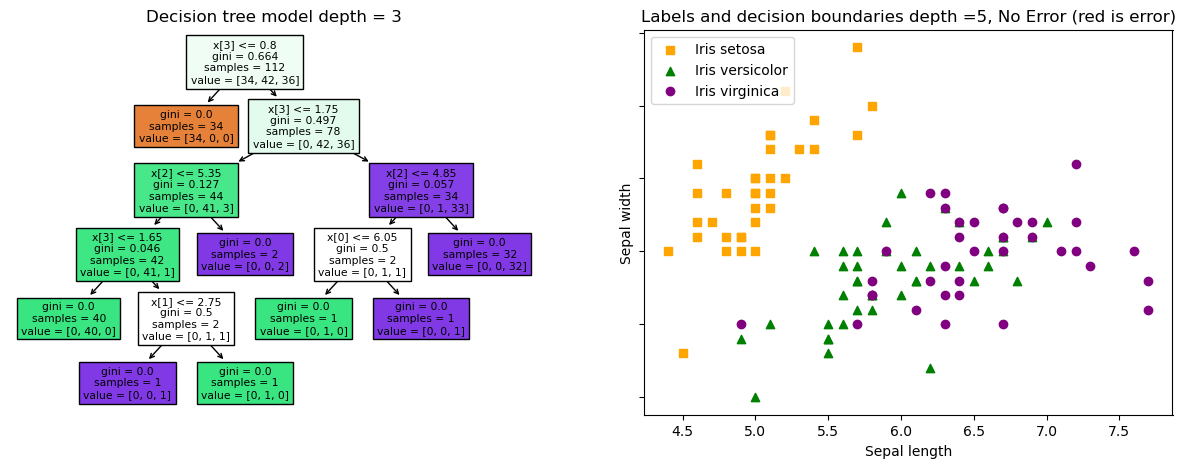

In [34]:
### deep diving on depth =5 
# use subplots to plot the decision tree and the decision boundaries
fig, (ax1, ax2 ) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

    # plot the decision tree
plot_tree(TreeModel_5, filled=True, ax=ax1)
ax1.set_title("Decision tree model depth = 3")

 


    # plot params
xlim0, xlim1 = 0, 7
ylim0, ylim1 = 0, 3

    # plot labels of 
ax2.scatter(X_train.values[y_train.values == 0, 0], X_train.values[y_train.values == 0, 1], color='orange', marker='s', label="Iris setosa")
ax2.scatter(X_train.values[y_train.values == 1, 0], X_train.values[y_train.values == 1, 1], color='green', marker='^', label="Iris versicolor")
ax2.scatter(X_train.values[y_train.values == 2, 0], X_train.values[y_train.values == 2, 1], color='purple', marker='o', label="Iris virginica")

ax2.scatter(X_train.values[(y_train.values == 0) & (y_pred_train_5!=0), 0], X_train.values[(y_train.values == 0) & (y_pred_train_5!=0), 1], color='red', marker='s' )
ax2.scatter(X_train.values[(y_train.values == 1) & (y_pred_train_5!=1), 0], X_train.values[(y_train.values == 1) & (y_pred_train_5!=1), 1], color='red', marker='^' )
ax2.scatter(X_train.values[(y_train.values == 2) & (y_pred_train_5!=2), 0], X_train.values[(y_train.values == 2) & (y_pred_train_5!=2), 1], color='red', marker='o' )

ax2.set_xlabel("Sepal length")
ax2.set_ylabel("Sepal width")
ax2.legend(loc="upper left")
ax2.set_title("Labels and decision boundaries depth =5, No Error (red is error)")









Text(0.5, 1.0, 'Labels and decision boundaries depth =5,  red is error')

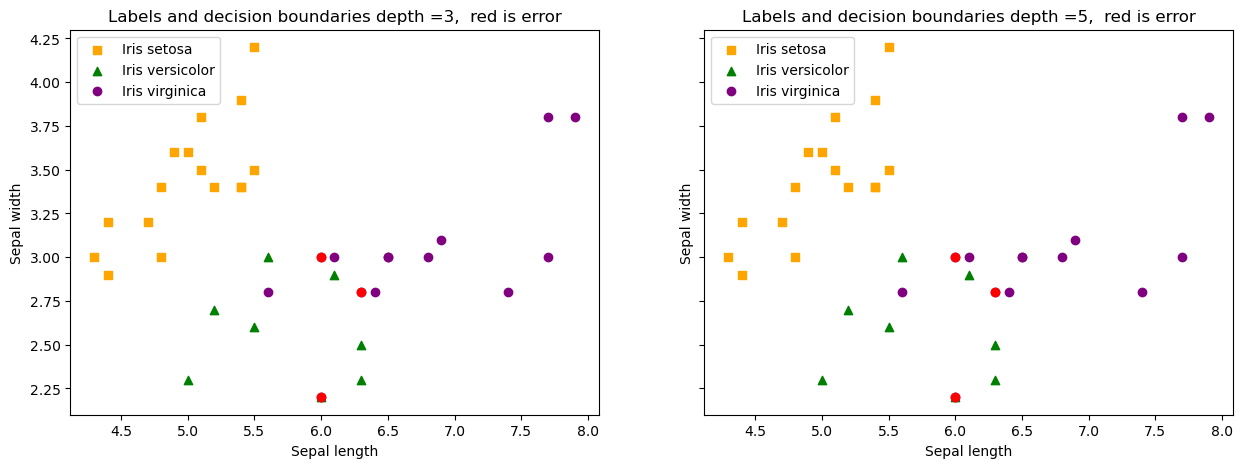

In [81]:
### comparing the testing of depth = 3 and 5 
# use subplots to plot the decision tree and the decision boundaries
fig, (ax1, ax2 ) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

 
    # plot params
xlim0, xlim1 = 0, 7
ylim0, ylim1 = 0, 3


    # plot labels of 
ax1.scatter(X_test.values[y_test.values == 0, 0], X_test.values[y_test.values == 0, 1], color='orange', marker='s', label="Iris setosa")
ax1.scatter(X_test.values[y_test.values == 1, 0], X_test.values[y_test.values == 1, 1], color='green', marker='^', label="Iris versicolor")
ax1.scatter(X_test.values[y_test.values == 2, 0], X_test.values[y_test.values == 2, 1], color='purple', marker='o', label="Iris virginica")

ax1.scatter(X_test.values[(y_test.values == 0) & (y_pred_test_3!=0), 0], X_test.values[(y_test.values == 0) & (y_pred_test_3!=0), 1], color='red', marker='s' )
ax1.scatter(X_test.values[(y_test.values == 1) & (y_pred_test_3!=1), 0], X_test.values[(y_test.values == 1) & (y_pred_test_3!=1), 1], color='red', marker='^' )
ax1.scatter(X_test.values[(y_test.values == 2) & (y_pred_test_3!=2), 0], X_test.values[(y_test.values == 2) & (y_pred_test_3!=2), 1], color='red', marker='o' )

ax1.set_xlabel("Sepal length")
ax1.set_ylabel("Sepal width")
ax1.legend(loc="upper left")
ax1.set_title("Labels and decision boundaries depth =3,  red is error")

    # plot labels of 
ax2.scatter(X_test.values[y_test.values == 0, 0], X_test.values[y_test.values == 0, 1], color='orange', marker='s', label="Iris setosa")
ax2.scatter(X_test.values[y_test.values == 1, 0], X_test.values[y_test.values == 1, 1], color='green', marker='^', label="Iris versicolor")
ax2.scatter(X_test.values[y_test.values == 2, 0], X_test.values[y_test.values == 2, 1], color='purple', marker='o', label="Iris virginica")

ax2.scatter(X_test.values[(y_test.values == 0) & (y_pred_test_5!=0), 0], X_test.values[(y_test.values == 0) & (y_pred_test_5!=0), 1], color='red', marker='s' )
ax2.scatter(X_test.values[(y_test.values == 1) & (y_pred_test_5!=1), 0], X_test.values[(y_test.values == 1) & (y_pred_test_5!=1), 1], color='red', marker='^' )
ax2.scatter(X_test.values[(y_test.values == 2) & (y_pred_test_5!=2), 0], X_test.values[(y_test.values == 2) & (y_pred_test_5!=2), 1], color='red', marker='o' )

ax2.set_xlabel("Sepal length")
ax2.set_ylabel("Sepal width")
ax2.legend(loc="upper left")
ax2.set_title("Labels and decision boundaries depth =5,  red is error")




In [35]:
import os
os.getcwd()

'C:\\Users\\daoal'